<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_3_Preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesado de datos

El preprocesado de datos es una etapa crucial en el desarrollo de modelos de aprendizaje automático y abarca varios procesos fundamentales:

1. **Limpieza de Datos**:
   - **Tratamiento de Valores Faltantes**: Pueden ser rellenados con un valor específico, la media, la mediana, etc.
   - **Eliminación de Duplicados**: Borrar o tratar las observaciones duplicadas.
   - **Eliminación de Outliers**: Identificar y tratar valores atípicos que pueden sesgar el modelo.

2. **Transformación de Datos**:
   - **Normalización y Escalado**: Cambio de escala de los datos para que todos estén en un rango similar.
   - **Codificación de Variables Categóricas**: Convertir categorías en una forma que el modelo pueda entender, como el One-Hot Encoding.
   - **Transformación de Características**: Crear nuevas características a partir de las existentes, como la combinación de variables, funciones polinómicas, etc.

3. **Reducción de Dimensionalidad**:
   - **Selección de Características**: Escoger las características más importantes que contribuyen al rendimiento del modelo.
   - **Técnicas de Reducción**: Utilizar técnicas como el Análisis de Componentes Principales (PCA) para reducir la complejidad de los datos sin perder información relevante.

4. **Partición de Datos**:
   - **División en Conjuntos de Entrenamiento, Validación y Prueba**: Esto permite evaluar el rendimiento del modelo en diferentes etapas y asegura que el modelo no se ajuste excesivamente a los datos.

5. **Manejo de Datos Desbalanceados**:
   - **Submuestreo y Sobremuestreo**: Técnicas para tratar con conjuntos de datos en los cuales una clase está sobrerrepresentada en comparación con la otra.

7. **Análisis Exploratorio de Datos (EDA)**:
   - **Visualización**: Gráficos y tablas para entender la naturaleza y relaciones entre las variables.
   - **Estadísticas Descriptivas**: Suministra una comprensión inicial de los datos a través de métricas como la media, mediana, desviación estándar, etc.

In [ ]:
# Cargamos rich para enriquecer texto
from rich.console import Console
console = Console()

# Cargamos las librerías de trabajo habituales
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Cargamos métodos de preprocesado relevantes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler




In [ ]:
# Utilizaremos el conjunto de datos de la flor de iris
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])


In [ ]:
console.rule("[blue] Información sobre los datos de trabajo [/blue]")
console.log(data.head())
console.log(f"\n Descripción de los datos ============= \n\n {data.describe()}")

────────────────────────────────────  Información sobre los datos de trabajo  ─────────────────────────────────────

[16:52:26]    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width  <ipython-input-3-431d7afd464b>:2
           (cm)                                                                                                    
           0                5.1               3.5                1.4                                               
           0.2                                                                                                     
           1                4.9               3.0                1.4                                               
           0.2                                                                                                     
           2                4.7               3.2                1.3                                               
           0.2                                                                                                     
           3                4.6               3.1                1.5                                               
           0.2                                                                                                     
           4                5.0               3.6                1.4                                               
           0.2                                                                                                     

                                                                                   <ipython-input-3-431d7afd464b>:3
            Descripción de los datos =============                                                                 
                                                                                                                   
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \                                       
           count         150.000000        150.000000         150.000000                                           
           mean            5.843333          3.057333           3.758000                                           
           std             0.828066          0.435866           1.765298                                           
           min             4.300000          2.000000           1.000000                                           
           25%             5.100000          2.800000           1.600000                                           
           50%             5.800000          3.000000           4.350000                                           
           75%             6.400000          3.300000           5.100000                                           
           max             7.900000          4.400000           6.900000                                           
                                                                                                                   
                  petal width (cm)                                                                                 
           count        150.000000                                                                                 
           mean           1.199333                                                                                 
           std            0.762238                                                                                 
           min            0.100000                                                                                 
           25%            0.300000                                                                                 
           50%            1.300000                                                                                 
           75%            1.800000                                                                                 
           max            2.500000                                                                                 

### Generación de NaNs para el ejercicio

In [ ]:
# Introduciomos algunos datos faltantes aleatoriamente

def generate_nans(data):
  np.random.seed(42) # Semilla para la reproducibilidad

  # Fracción de valores a convertir en NaN (por ejemplo, el 5%)
  fraction = 0.05

  # Máscara para seleccionar entradas
  mask = np.random.rand(*data.shape) < fraction

  # Conversión de las entradas seleccionadas en NaN
  data[mask] = np.nan

# Generamos los datos faltantes
generate_nans(data)

# Comprobando si hay valores faltantes
missing_values = data.isna()
console.log(f"\n - Hay datos faltantes como NaNs:\n", missing_values)

# También puedes usar isnull() (Equivalente al anterior, pero se recomienda el método isna() )
missing_values = data.isnull()
console.log(f"\n - Hay datos faltantes como nulos:\n", missing_values)

# Cuántos valores faltantes o NaNs contiene el dataset:
console.rule("Datos faltantes")
console.log("Número de datos faltantes:\n", data.isna().sum())

                                                                                  <ipython-input-4-8ae44483886d>:20
            - Hay datos faltantes como NaNs:                                                                       
                 sepal length (cm)  sepal width (cm)  petal length (cm)  petal                                     
           width (cm)                                                                                              
           0                False             False              False                                             
           False                                                                                                   
           1                False             False              False                                             
           False                                                                                                   
           2                False             False               True                                             
           False                                                                                                   
           3                False             False              False                                             
           False                                                                                                   
           4                False             False              False                                             
           False                                                                                                   
           ..                 ...               ...                ...                                             
           ...                                                                                                     
           145              False             False              False                                             
           False                                                                                                   
           146              False             False              False                                             
           False                                                                                                   
           147              False             False              False                                             
           False                                                                                                   
           148              False             False              False                                             
           False                                                                                                   
           149              False             False              False                                             
           True                                                                                                    
                                                                                                                   
           [150 rows x 4 columns]                                                                                  

                                                                                  <ipython-input-4-8ae44483886d>:24
            - Hay datos faltantes como nulos:                                                                      
                 sepal length (cm)  sepal width (cm)  petal length (cm)  petal                                     
           width (cm)                                                                                              
           0                False             False              False                                             
           False                                                                                                   
           1                False             False              False                                             
           False                                                                                                   
           2                False             False               True                                             
           False                                                                                                   
           3                False             False              False                                             
           False                                                                                                   
           4                False             False              False                                             
           False                                                                                                   
           ..                 ...               ...                ...                                             
           ...                                                                                                     
           145              False             False              False                                             
           False                                                                                                   
           146              False             False              False                                             
           False                                                                                                   
           147              False             False              False                                             
           False                                                                                                   
           148              False             False              False                                             
           False                                                                                                   
           149              False             False              False                                             
           True                                                                                                    
                                                                                                                   
           [150 rows x 4 columns]                                                                                  

───────────────────────────────────────────────── Datos faltantes ─────────────────────────────────────────────────

           Número de datos faltantes:                                             <ipython-input-4-8ae44483886d>:28
            sepal length (cm)    11                                                                                
           sepal width (cm)      7                                                                                 
           petal length (cm)     9                                                                                 
           petal width (cm)      9                                                                                 
           dtype: int64                                                                                            

### Eliminación de Filas o Columnas con Valores Faltantes


In [ ]:
# Eliminando filas con al menos un valor faltante
data.dropna(inplace=True)

# Eliminando columnas con al menos un valor faltante
data.dropna(axis=1, inplace=True)

# Comprobamos que ya no hay datos faltantes:
console.rule("Datos faltantes")
console.log(data.isna().sum())

───────────────────────────────────────────────── Datos faltantes ─────────────────────────────────────────────────

           sepal length (cm)    0                                                  <ipython-input-5-79f382a815db>:9
           sepal width (cm)     0                                                                                  
           petal length (cm)    0                                                                                  
           petal width (cm)     0                                                                                  
           dtype: int64                                                                                            

### Rellenando Valores Faltantes con la Media, Mediana, etc.


In [ ]:
# Generamos los NaNs (solo para esta demostración)
generate_nans(data)
console.rule("Datos iniciales")
console.log(data.isna().sum())

# Rellenando con la media
data['sepal length (cm)'] = data['sepal length (cm)'].fillna(data['sepal length (cm)'].mean())
data['sepal width (cm)'] = data['sepal width (cm)'].fillna(data['sepal width (cm)'].mean())

# Rellenando con la mediana
data['petal length (cm)'] = data['sepal length (cm)'].fillna(data['sepal length (cm)'].median())

# Comprobamos resultado
console.rule("Datos finales")
console.log(data.isna().sum())

───────────────────────────────────────────────── Datos iniciales ─────────────────────────────────────────────────

           sepal length (cm)    11                                                 <ipython-input-6-b39130c06cf8>:4
           sepal width (cm)      6                                                                                 
           petal length (cm)     7                                                                                 
           petal width (cm)      6                                                                                 
           dtype: int64                                                                                            

────────────────────────────────────────────────── Datos finales ──────────────────────────────────────────────────

           sepal length (cm)    0                                                 <ipython-input-6-b39130c06cf8>:15
           sepal width (cm)     0                                                                                  
           petal length (cm)    0                                                                                  
           petal width (cm)     6                                                                                  
           dtype: int64                                                                                            

In [ ]:
### 2. Eliminación de Duplicados
number_of_duplicates = data.duplicated().sum()
print(f"Número de entradas duplicadas: {number_of_duplicates}")
data.drop_duplicates(inplace=True)

Número de entradas duplicadas: 3


### Eliminación de Outliers


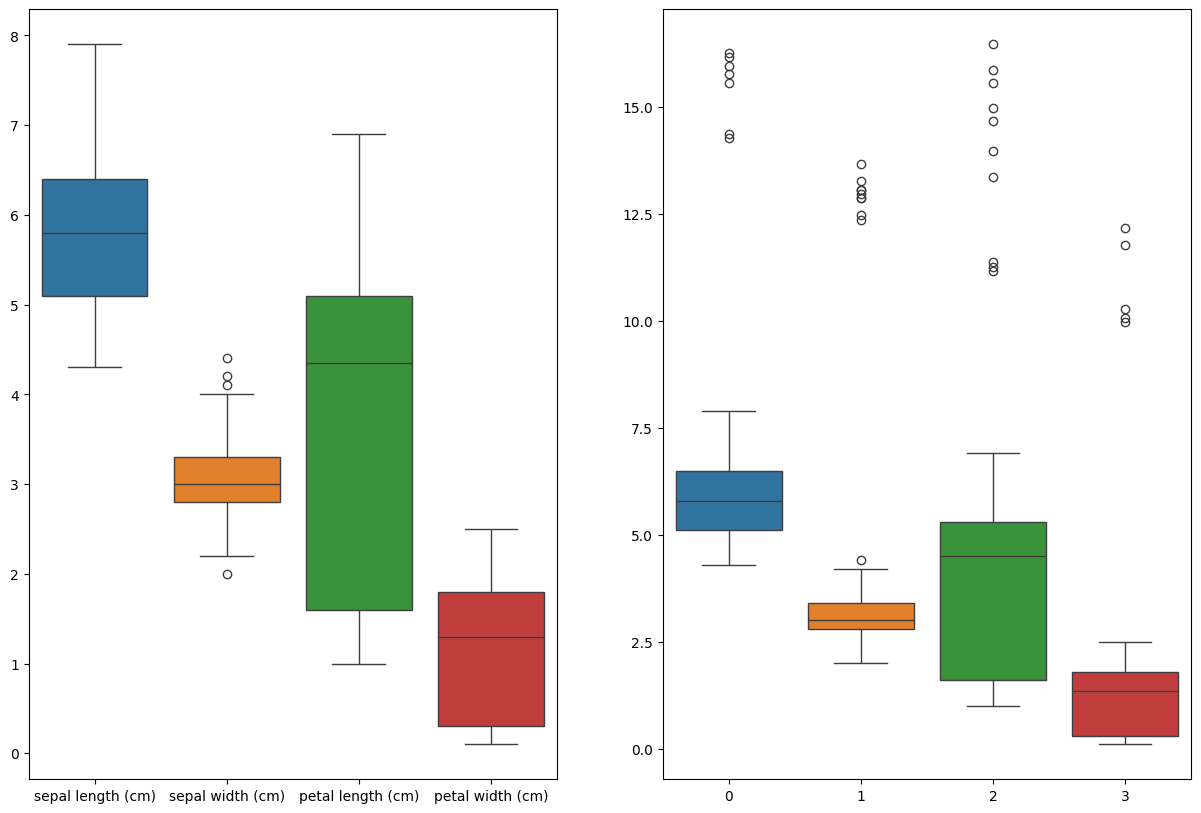

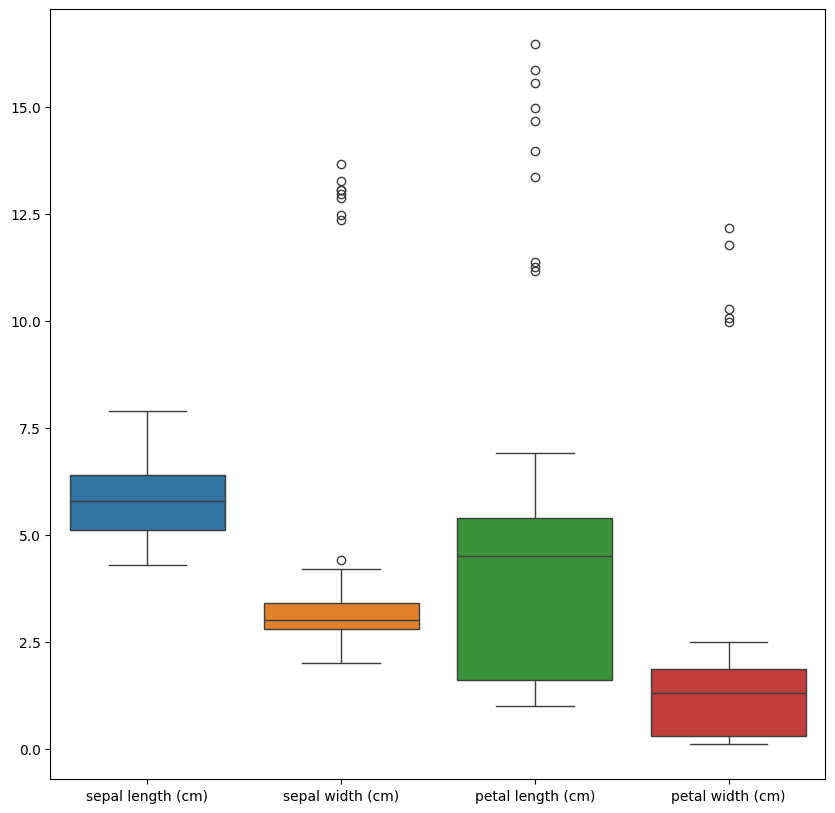

In [ ]:
# Cargamos de nuevo los datos de trabajo
iris = load_iris()

# Generamos un conjuto de referencia (ini) con fines demostrativos
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data_ini = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

def generate_outliers(data: pd.DataFrame):
  """ Generador de outliers """
  # Introducción de outliers de forma aleatoria (por ejemplo, en el 1% de los datos)
  fraction_outliers = 0.05
  data_outliers = np.copy(data)
  mask_outliers = np.random.rand(*data_outliers.shape) < fraction_outliers
  data_outliers[mask_outliers] += 5 * data_outliers.std()
  return data_outliers

data_outliers = generate_outliers(data)

# Comprobamos visualmente los outliers
fig = plt.figure(1, figsize=(15,10))
ax1 = fig.add_subplot(121)
sns.boxplot(data=data_ini, ax=ax1)
ax2 = fig.add_subplot(122)
sns.boxplot(data=data_outliers, ax=ax2)
plt.show()

# Restructuramos los datos
data_outliers = pd.DataFrame(data_outliers, columns=data.columns)

def select_valid_range():
  raise(NotImplementedError)

# Seleccionamos rango de validez
Q1 = data_outliers['sepal length (cm)'].quantile(0.25)
Q3 = data_outliers['sepal length (cm)'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminando los outliers
data_outliers = data_outliers[(data_outliers['sepal length (cm)'] >= lower_bound) & (data_outliers['sepal length (cm)'] <= upper_bound)]

# data_outliers = data_outliers[(data_outliers['sepal width (cm)'] >= lower_bound) & (data_outliers['sepal length (cm)'] <= upper_bound)]

# Comprobamos visualmente el resultado
fig = plt.figure(2, figsize=(10,10))
ax = fig.add_subplot(111)
sns.boxplot(data=data_outliers, ax=ax)
plt.show()

## Normalización

### StandardScaler
Estandarice las características eliminando la media y escalando a la varianza unitaria.

* [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [ ]:
"""
Utilizaremos scikit-learn para aplicar la técnica de preprocesamiento StandardScaler.
El objetivo es transformar los datos para que tengan una media cero y una desviación
estándar unitaria.
"""
iris = load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Usaremos el rescalador estándar de Scikit-learn
scaler = StandardScaler()

# Rescalamos los datos teniendo en cuenta la media y desviación estándar de cada variable
# El método "fit" ajusta el modelo a los datos originales.
scaler.fit(data.values)

# Utilizamos la función "transform" de la clase StandardScaler para aplicar
# la transformación a los datos originales. El resultado de esta transformación
# se almacena en la variable "X_scaled"
data_norm = scaler.transform(data.values)

# Comprobarmos el resultado
console.log("Datos iniciales:\n", data[:10])
console.log("Datos rescalados:\n", data_norm[:10])

[16:52:30] Datos iniciales:                                                       <ipython-input-9-72f860348903>:22
               sepal length (cm)  sepal width (cm)  petal length (cm)  petal                                       
           width (cm)                                                                                              
           0                5.1               3.5                1.4                                               
           0.2                                                                                                     
           1                4.9               3.0                1.4                                               
           0.2                                                                                                     
           2                4.7               3.2                1.3                                               
           0.2                                                                                                     
           3                4.6               3.1                1.5                                               
           0.2                                                                                                     
           4                5.0               3.6                1.4                                               
           0.2                                                                                                     
           5                5.4               3.9                1.7                                               
           0.4                                                                                                     
           6                4.6               3.4                1.4                                               
           0.3                                                                                                     
           7                5.0               3.4                1.5                                               
           0.2                                                                                                     
           8                4.4               2.9                1.4                                               
           0.2                                                                                                     
           9                4.9               3.1                1.5                                               
           0.1                                                                                                     

           Datos rescalados:                                                      <ipython-input-9-72f860348903>:23
            [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]                                                     
            [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]                                                      
            [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]                                                      
            [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]                                                      
            [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]                                                      
            [-0.53717756  1.93979142 -1.16971425 -1.05217993]                                                      
            [-1.50652052  0.78880759 -1.34022653 -1.18381211]                                                      
            [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]                                                      
            [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]                                                      
            [-1.14301691  0.09821729 -1.2833891  -1.44707648]]                                                     

In [ ]:
# Veamos un ejemplo con datos más fáciles de interpretar

# Creamos un DataFrame de ejemplo
data = {
    'Feature1': [1.0, 2.0, 3.0, 4.0, 5.0],
    'Feature2': [10.0, 20.0, 30.0, 40.0, 50.0],
    'Feature3': [100.0, 200.0, 300.0, 400.0, 500.0]
}
df = pd.DataFrame(data)

# Mostramos el DataFrame original
print("DataFrame Original:\n", df)

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Rescalamos los datos teniendo en cuenta la media y desviación estándar de cada variable
# El método "fit" ajusta el modelo a los datos originales.
scaler.fit(df.values)

# Utilizamos la función "transform" de la clase StandardScaler para aplicar
# la transformación a los datos originales. El resultado de esta transformación
# se almacena en la variable "X_scaled"
X_scaled = scaler.transform(df.values)

# Mostramos el DataFrame transformado
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
print("\nDataFrame Escalado:\n", df_scaled)


DataFrame Original:
    Feature1  Feature2  Feature3
0       1.0      10.0     100.0
1       2.0      20.0     200.0
2       3.0      30.0     300.0
3       4.0      40.0     400.0
4       5.0      50.0     500.0

DataFrame Escalado:
    Feature1  Feature2  Feature3
0 -1.414214 -1.414214 -1.414214
1 -0.707107 -0.707107 -0.707107
2  0.000000  0.000000  0.000000
3  0.707107  0.707107  0.707107
4  1.414214  1.414214  1.414214


### MinMaxScaler
Transforma las características escalándolas a un intervalo determinado.
Este estimador escala y traduce cada característica individualmente de forma que se encuentre en el rango dado en el conjunto de entrenamiento, por ejemplo, entre cero y uno.

* [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
# Volvemos a carga los datos de partida para obviar transformaciones previas (solo con fines demostrativos)
iris = load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Creamos el MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Seleccionamos columnas con valores numéricos de interés
columns_to_scale = ['sepal length (cm)',  'sepal width (cm)']
data_s = data[columns_to_scale]

# Imprimimos los datos originales
print(" => Datos NO rescalados: \n", data_s.head())

# Aplicamos la función de scaling
data_scaled = pd.DataFrame(scaler.fit_transform(data_s), columns=columns_to_scale)

# Imprimimos los datos rescalados
print(" => Datos rescalados: \n", df_scaled.head())

 => Datos NO rescalados: 
    sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
 => Datos rescalados: 
    Feature1  Feature2  Feature3
0 -1.414214 -1.414214 -1.414214
1 -0.707107 -0.707107 -0.707107
2  0.000000  0.000000  0.000000
3  0.707107  0.707107  0.707107
4  1.414214  1.414214  1.414214


Text(0.5, 1.0, 'Normalizado')

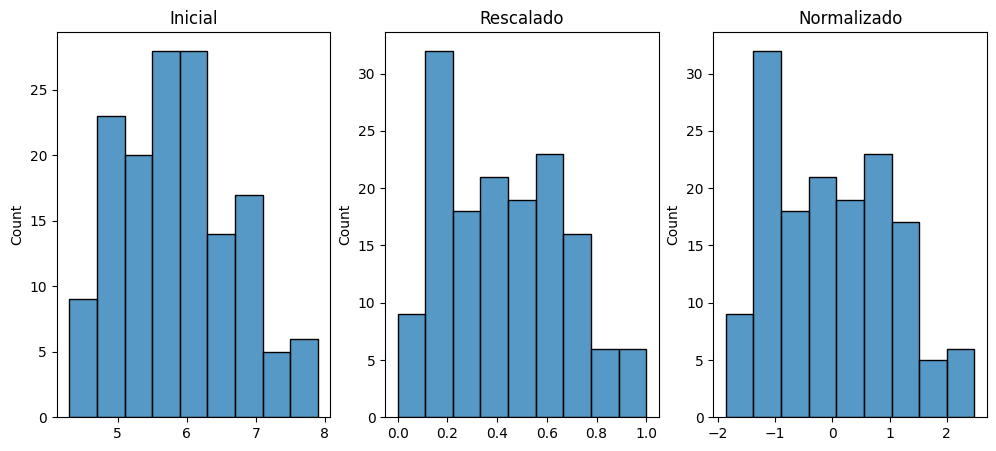

In [ ]:
# Normalización estándar de los datos, también conocida como escala Z o estandarización Z
data_norm = (data_scaled - data_scaled.mean()) / data_scaled.std()


### Visualización de los datos

fig = plt.figure(1, figsize=(12, 5))
plt.subplot(131)
sns.histplot(data['sepal length (cm)'].values)
plt.title("Inicial")
plt.subplot(132)
sns.histplot(data_scaled['sepal length (cm)'].values)
plt.title("Rescalado")
plt.subplot(133)
sns.histplot(data_norm['sepal length (cm)'].values)
plt.title("Normalizado")

# NOTA

Los siguiente ejemplos son complementarios a los ejercicios vistos en la semana previa:
* Enlaces a los cuadernos respectivos:
  * [Cuaderno 1](https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_3_Preprocesado_y_estructuracion_de_datos.ipynb)
  * [Cuaderno 2](https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_3_Extraccion_de_caracteristicas.ipynb#scrollTo=y8u270f2nEm-)


## Codificación de variables categóricas
La mayoría de los algoritmos de Machine Learning requieren que todas las variables sean numéricas. Por lo tanto, las variables categóricas deben ser codificadas en una forma numérica antes de entrar al modelo durante el proceso de entrenamiento (y/o inferencia).

In [ ]:
# Creamos un DataFrame de ejemplo
data = {
    'Tipo': ['Manzana', 'Naranja', 'Plátano', 'Naranja', 'Manzana'],
    'Color': ['Rojo', 'Naranja', 'Amarillo', 'Naranja', 'Verde']
}
df = pd.DataFrame(data)

# Mostramos el DataFrame original
print("DataFrame Original:\n", df)

# Codificación con OneHotEncoder usando get_dummies de pandas
# Creamos variables dummy para las variables categóricas
df_encoded = pd.get_dummies(df, columns=['Tipo', 'Color'], prefix=['Tipo', 'Color'])

# Mostramos el DataFrame con las variables codificadas
print("\nDataFrame con Variables Codificadas:\n", df_encoded)

# Codificación numérica con factorize de pandas
# Codificamos la variable categórica 'Tipo' numéricamente
df['Tipo_codificado'] = pd.factorize(df['Tipo'])[0]

# Mostramos el DataFrame con la variable 'Tipo' codificada numéricamente
print("\nDataFrame con Variable 'Tipo' Codificada Numéricamente:\n", df)

DataFrame Original:
       Tipo     Color
0  Manzana      Rojo
1  Naranja   Naranja
2  Plátano  Amarillo
3  Naranja   Naranja
4  Manzana     Verde

DataFrame con Variables Codificadas:
    Tipo_Manzana  Tipo_Naranja  Tipo_Plátano  Color_Amarillo  Color_Naranja  \
0          True         False         False           False          False   
1         False          True         False           False           True   
2         False         False          True            True          False   
3         False          True         False           False           True   
4          True         False         False           False          False   

   Color_Rojo  Color_Verde  
0        True        False  
1       False        False  
2       False        False  
3       False        False  
4       False         True  

DataFrame con Variable 'Tipo' Codificada Numéricamente:
       Tipo     Color  Tipo_codificado
0  Manzana      Rojo                0
1  Naranja   Naranja                1

# Reducción de la dimensionalidad (Extracción de características)

### Análisis de la componente principal (PCA)
El análisis de la componente principal, o PCA por sus siglas en inglés, es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos. PCA nos permite simplificar la información presente en un conjunto de datos con múltiples variables y transformarla en un conjunto de datos reducido, pero que todavía retiene gran parte de la información original.

El objetivo del PCA es encontrar una representación de los datos que sea más fácil de entender y que conserve la mayor cantidad posible de la varianza en los datos.

Para llevar a cabo un análisis PCA primero se calcula la matriz de covarianza de los datos originales. A continuación, se calculan los vectores propios de esta matriz, que nos indican las direcciones en las que los datos tienen la mayor varianza. Luego, se proyectan los datos originales en estas direcciones y se obtiene un nuevo conjunto de datos con menos variables que aún captura gran parte de la información original.


In [ ]:
console.rule("[blue] Análisis de la componente principal [/blue]")
# Vamos a utilizar las funciones de Sci-kit learn para análisis PCA
from sklearn.decomposition import PCA

# Cargaremos en este caso los siguientes datos
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
console.log(df.describe())

──────────────────────────────────────  Análisis de la componente principal  ──────────────────────────────────────

[16:52:34]        mean radius  mean texture  mean perimeter    mean area  \       <ipython-input-14-a8b7ec1f01e9>:9
           count   569.000000    569.000000      569.000000   569.000000                                           
           mean     14.127292     19.289649       91.969033   654.889104                                           
           std       3.524049      4.301036       24.298981   351.914129                                           
           min       6.981000      9.710000       43.790000   143.500000                                           
           25%      11.700000     16.170000       75.170000   420.300000                                           
           50%      13.370000     18.840000       86.240000   551.100000                                           
           75%      15.780000     21.800000      104.100000   782.700000                                           
           max      28.110000     39.280000      188.500000  2501.000000                                           
                                                                                                                   
                  mean smoothness  mean compactness  mean concavity  mean concave                                  
           points  \                                                                                               
           count       569.000000        569.000000      569.000000                                                
           569.000000                                                                                              
           mean          0.096360          0.104341        0.088799                                                
           0.048919                                                                                                
           std           0.014064          0.052813        0.079720                                                
           0.038803                                                                                                
           min           0.052630          0.019380        0.000000                                                
           0.000000                                                                                                
           25%           0.086370          0.064920        0.029560                                                
           0.020310                                                                                                
           50%           0.095870          0.092630        0.061540                                                
           0.033500                                                                                                
           75%           0.105300          0.130400        0.130700                                                
           0.074000                                                                                                
           max           0.163400          0.345400        0.426800                                                
           0.201200                                                                                                
                                                                                                                   
                  mean symmetry  mean fractal dimension  ...  worst radius  \                                      
           count     569.000000              569.000000  ...    569.000000                                         
           mean        0.181162                0.062798  ...     16.269190                                         
           std         0.027414                0.007060  ...      4.833242                                         
           min         0.106000                0.049960  ...      7.930000                                         
           25%         0.161900                0.057700 

In [ ]:

# Estandarizamos los datos
scaler = StandardScaler()
scaler.fit(df.values)
data_scaled = scaler.transform(df.values)

console.log("Número de características:", data_scaled.shape[1])

# Para evaluar los resultados, utilizaremos el conjunto completo de variables
# "n_components" = 30 especifica que el PCA se ha de ajustar a los datos para encontrar
# las 30 componentes principales.
pca = PCA(n_components=30, random_state=2020)
pca.fit(data_scaled)

# Almacenamos en la variable X_pca los valores de los (30) componentes principales
X_pca = pca.transform(data_scaled)
print("X_pca:\n", X_pca)

# Puesto que seleccionamos el conjunto completo de variables las componenete
# seleccionadas deben dar cuenta del 100% de la varianza en los datos
print("\n => Varianza explicada por las componentes:", sum(pca.explained_variance_ratio_ * 100))

           Número de características: 30                                          <ipython-input-15-628cb7e998b3>:6

X_pca:
 [[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ... -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ...  3.26241827e-02
  -5.68742432e-03 -1.86787626e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ...  4.70258247e-02
   3.14589659e-03  7.50534755e-04]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ... -2.57775589e-03
   6.70621179e-03  3.77041667e-03]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ... -6.80863833e-02
  -8.41632764e-02 -2.37828222e-02]
 [-5.47524330e+00 -6.70636791e-01  1.49044308e+00 ... -9.51587894e-03
  -6.09131090e-02 -1.94755854e-02]]

 => Varianza explicada por las componentes: 100.00000000000001


Text(0, 0.5, 'Porcentaje de varianza explicado')

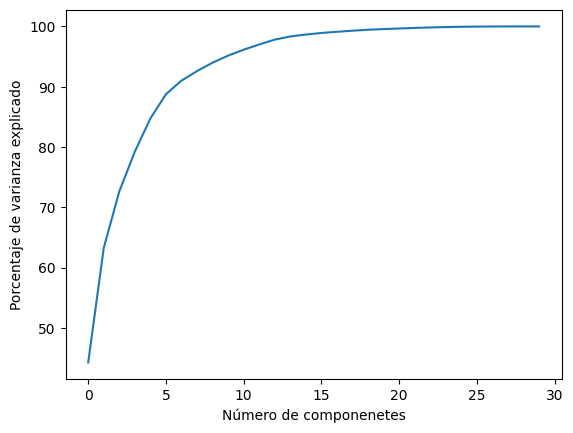

In [ ]:
# Si representamos la varianza en función del número de componentes podemos observar
# cuál es el mínimo número de componenetes que necesitaremos para explicar un cierto
# porcentaje de la varianza
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Número de componenetes")
plt.ylabel("Porcentaje de varianza explicado")

In [ ]:
# Vemos que con solo un tercio de las variables podemos explicar el 95% de la variaza
n_var = np.cumsum(pca.explained_variance_ratio_ * 100)[9]
print("Varianza 10 primeras componenetes:", n_var)

Varianza 10 primeras componenetes: 95.15688143366668


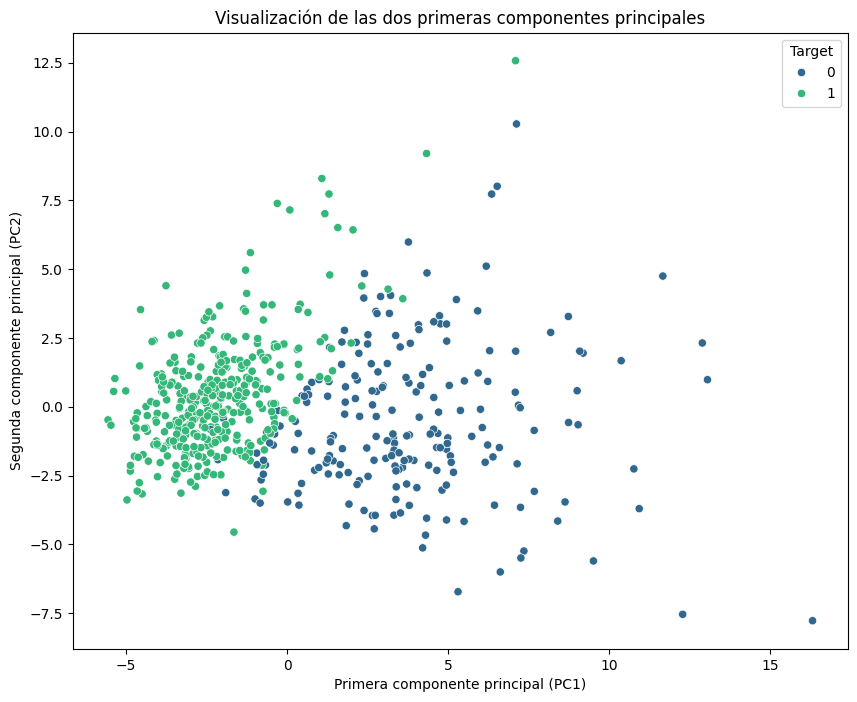

In [ ]:
# Alternativamente, podemos construir el conjunto que acomode el 95% de la variaza
# del siguiente modo

# Ajustar PCA para conservar el 95% de la varianza
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(data_scaled)
X_pca_95 = pca_95.transform(data_scaled)

# Convertir las dos primeras componentes principales en un DataFrame para una mejor visualización
pca_df = pd.DataFrame(X_pca_95[:, :2], columns=['PC1', 'PC2'])

# Suponiendo que 'cancer_data.target' es una Serie o lista con las etiquetas de destino, añadirla al DataFrame
pca_df['Target'] = cancer_data.target

# Visualizar la relación de las dos primeras componentes principales con un gráfico de dispersión
plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='viridis')
plt.title('Visualización de las dos primeras componentes principales')
plt.xlabel('Primera componente principal (PC1)')
plt.ylabel('Segunda componente principal (PC2)')
plt.legend(title='Target')
plt.show()


### Notas
El gráfico de dispersión generado a partir de las dos primeras componentes principales (PC1 y PC2) del PCA busca representar la estructura subyacente de los datos en un espacio de menor dimensión. Esto puede revelar información sobre las relaciones entre las observaciones y las diferencias entre las clases (en este caso, representadas por cancer_data.target).

* **Clusters Separados**: Si las observaciones de diferentes clases forman clusters distintos y claramente separados en el gráfico, esto indica que hay diferencias significativas entre las clases. Esto podría sugerir que las características originales contienen información valiosa para diferenciar las clases.

* **Sobrelapamiento de Clusters**: Si los clusters están sobrelapados pero todavía hay alguna separación, esto podría sugerir que hay alguna información en los datos para diferenciar las clases, pero no es tan clara. Puede haber características que contribuyan al ruido o la separación puede requerir más de dos dimensiones para ser claramente visible.

* **Ausencia de Clusters**: Si no hay una separación clara entre las clases y las observaciones están mezcladas, esto podría indicar que las características originales no son muy útiles para diferenciar las clases, al menos en las dos primeras componentes principales.


## Análisis de Componentes Independientes (ICA)

In [ ]:
# Utilizaremos datos de fMRI para nuestro ejemplo con ICA
# Para ello, comenzamos instalando la librería nilearn
!python -m pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 22.1 MB/s eta 0:00:00


In [ ]:
from nilearn import datasets
# Descargamos un sujeto del estudio con RM funcional
dataset = datasets.fetch_development_fmri(n_subjects=1)
file_name = dataset.func[0]

# Preprocesado de la imagen
from nilearn.input_data import NiftiMasker

# Aplicamos una máscara para extraer el fondo de la imagen (vóxeles no cerebrales)
masker = NiftiMasker(smoothing_fwhm=8, memory='nilearn_cache', memory_level=1,
                     mask_strategy='epi', standardize=True)
data_masked = masker.fit_transform(file_name)


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/development_fmri


Added README.md to /root/nilearn_data/development_fmri


Dataset created in /root/nilearn_data/development_fmri/development_fmri



 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


In [ ]:
from sklearn.decomposition import FastICA
import numpy as np
# Seleccionamos 10 componentes
ica = FastICA(n_components=10, random_state=42)
components_masked = ica.fit_transform(data_masked.T).T
# Aplicamos un corte (80% señal) en los datos después de normalizar según
# la media y desviación estándar de los datos
components_masked -= components_masked.mean(axis=0)
components_masked /= components_masked.std(axis=0)
components_masked[np.abs(components_masked) < .8] = 0
# Invertimos la transformación para recuperar la estructura 3D
component_img = masker.inverse_transform(components_masked)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


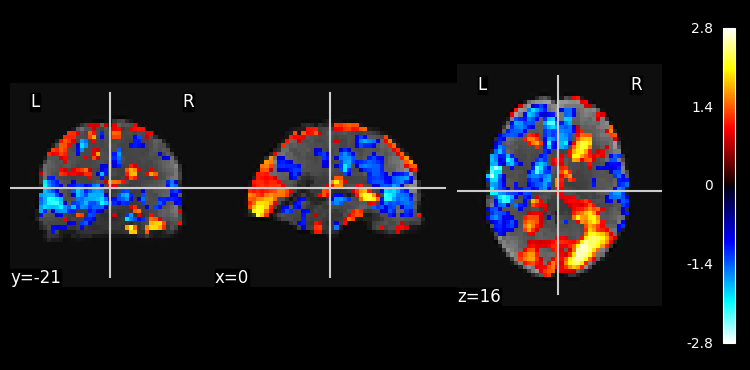

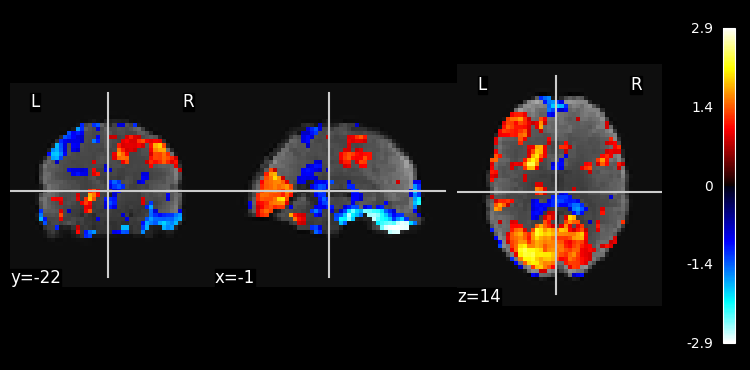

In [ ]:
# Finalmete, visualizamos el resultado de las operaciones de reducción
from nilearn import image
from nilearn.plotting import plot_stat_map, show
mean_img = image.mean_img(file_name)
plot_stat_map(image.index_img(component_img, 0), mean_img)
plot_stat_map(image.index_img(component_img, 1), mean_img)

In [ ]:
# Exportamos los datos para analizarlos con otra herramienta...
cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
df.to_csv("sample_data/cancer_data.csv")